<a href="https://colab.research.google.com/github/Nilufayeasmin299/Phishig-detection-using-both-machine-learning-and-deep-learning-techniques/blob/main/Phishing_detection_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**Loading Dataset**

In [48]:
#loading dataset
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Second paper/Dataset/Training Dataset.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


#**Familiarizing with Data**

In [49]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [50]:
df.shape

(11055, 31)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

#**Visualizing the data**

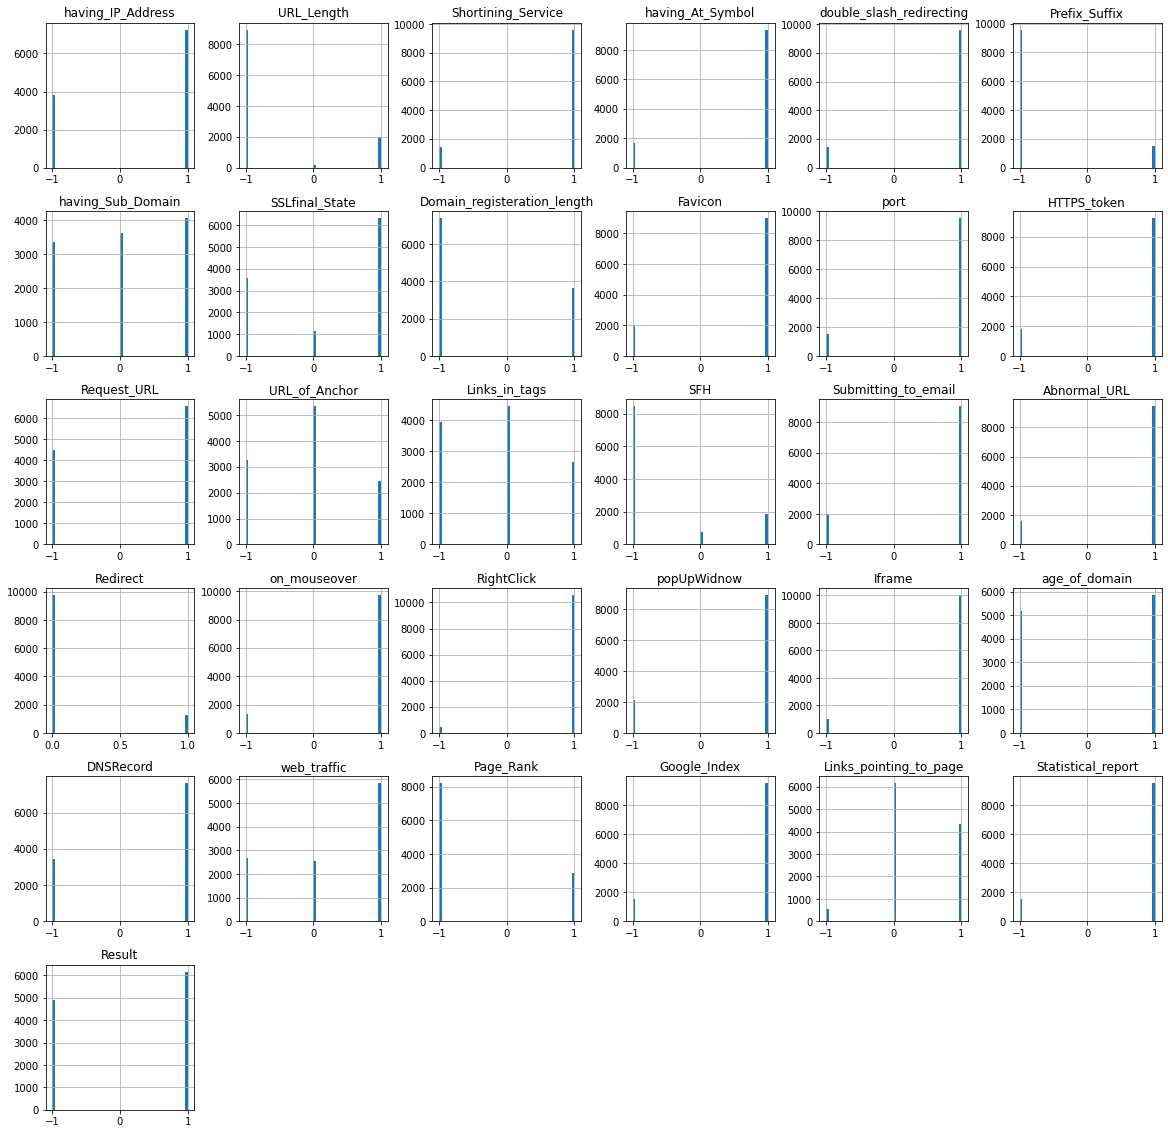

In [52]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (20,20))
plt.show()

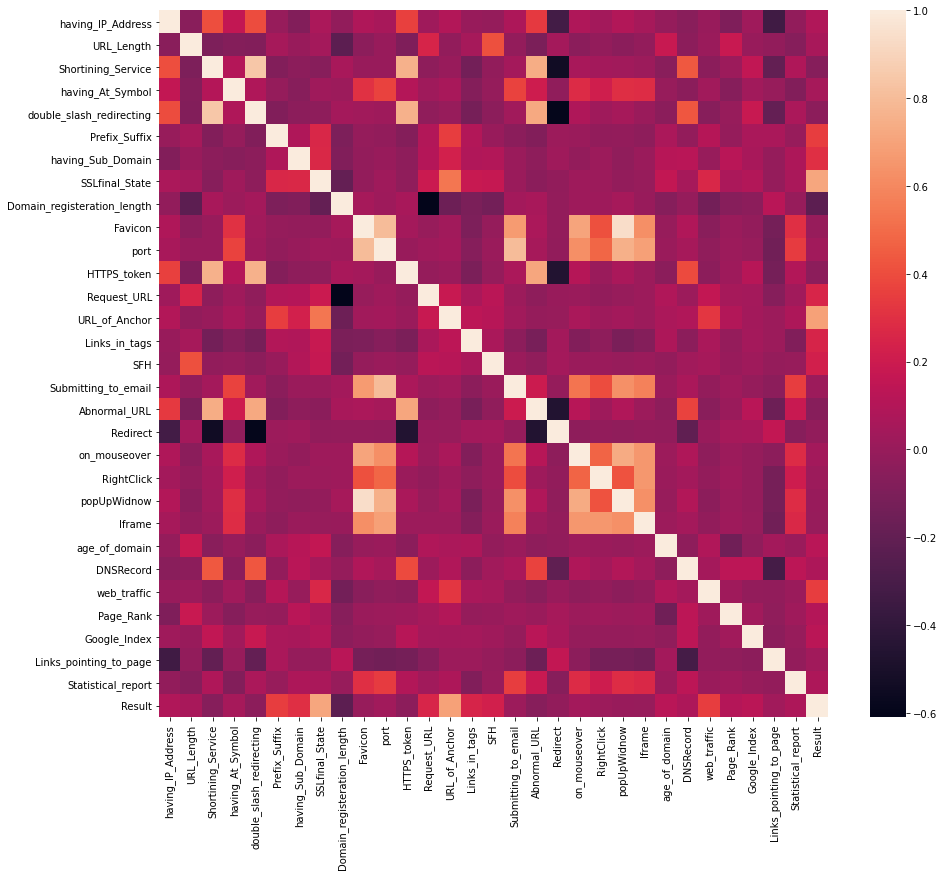

In [55]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

#**Data Preprocessing & EDA**

In [56]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:

#checking the data for null or missing values
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [58]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = df.sample(frac=1).reset_index(drop=True)
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,-1,1,1,1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1,1,0,-1,1,-1,1,1,1,-1,-1,1,-1,1,1
1,-1,1,1,1,1,-1,1,0,1,1,1,1,-1,-1,0,-1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,-1
2,-1,1,-1,1,1,1,1,1,-1,1,1,-1,1,0,1,-1,1,1,0,1,1,1,1,1,1,-1,1,1,-1,1,1
3,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1,1
4,1,-1,1,1,1,-1,0,-1,-1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1


#**Splitting dataset**

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [60]:
df['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [61]:
legitimate=df[df['Result']==1]
phishing=df[df['Result']==-1]

In [62]:
legitimate.shape, phishing.shape

((6157, 31), (4898, 31))

In [63]:
y=df['Result']
X=df.drop('Result',axis=1)

In [64]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, stratify=y)

In [65]:
X_train.shape

(8844, 30)

In [66]:
X_test.shape

(2211, 30)

#**Reshape the dataset**

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [68]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [69]:
#importing all dataset foe training deep learning model
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, MaxPooling1D, BatchNormalization
from keras.layers import Activation, Dense, Dropout

#**Single 1D CONV**

In [70]:
model=Sequential()
model.add(Conv1D(filters=64, kernel_size=10, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 21, 64)            704       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 64)            256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 5128      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                

In [71]:
# Store training stats
history = model.fit(X_train, y_train, epochs=100,
                    validation_split=0.2, verbose=1)


Epoch 1/100
222/222 [==============================] - 2s 5ms/step - loss: -9.6480 - accuracy: 0.3928 - val_loss: -42.1269 - val_accuracy: 0.2962
Epoch 2/100
222/222 [==============================] - 1s 4ms/step - loss: -144.3690 - accuracy: 0.3536 - val_loss: -401.0706 - val_accuracy: 0.3058
Epoch 3/100
222/222 [==============================] - 1s 4ms/step - loss: -586.2373 - accuracy: 0.2920 - val_loss: -1221.3450 - val_accuracy: 0.2764
Epoch 4/100
222/222 [==============================] - 1s 4ms/step - loss: -1505.8558 - accuracy: 0.2653 - val_loss: -2557.5679 - val_accuracy: 0.2679
Epoch 5/100
222/222 [==============================] - 1s 3ms/step - loss: -2922.8100 - accuracy: 0.2608 - val_loss: -4463.5703 - val_accuracy: 0.2657
Epoch 6/100
222/222 [==============================] - 1s 4ms/step - loss: -4788.9236 - accuracy: 0.2701 - val_loss: -7260.0928 - val_accuracy: 0.2493
Epoch 7/100
222/222 [==============================] - 1s 4ms/step - loss: -7672.5899 - accuracy: 0.26

In [73]:
y_pred=model.predict(X_test)

In [74]:
import numpy as np 
y_pred= np.argmax(y_pred,axis=1)

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     980.0
           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00    1231.0

    accuracy                           0.00    2211.0
   macro avg       0.00      0.00      0.00    2211.0
weighted avg       0.00      0.00      0.00    2211.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Multi 1D CONV**

In [76]:
def build_conv1D_model():

  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(30, 1)))
  model.add(keras.layers.Conv1D(16, 10, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(32, 10, activation='relu', name="Conv1D_2"))
  
  model.add(keras.layers.Conv1D(64, 10, activation='relu', name="Conv1D_3"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(8, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(1, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 21, 16)            176       
_________________________________________________________________
dropout_7 (Dropout)          (None, 21, 16)            0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 12, 32)            5152      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 3, 64)             20544     
_________________________________________________________________
MaxPooling1D (MaxPooling1D)  (None, 1, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 8)                

In [77]:
# Store training stats
history = model.fit(X_train, y_train, epochs=100,
                    validation_split=0.2, verbose=1)

Epoch 1/100
222/222 [==============================] - 1s 4ms/step - loss: -7319361.0000 - accuracy: 0.2606 - val_loss: -7752105.5000 - val_accuracy: 0.2510
Epoch 2/100
222/222 [==============================] - 1s 4ms/step - loss: -7559584.5000 - accuracy: 0.2646 - val_loss: -7938810.0000 - val_accuracy: 0.2504
Epoch 3/100
222/222 [==============================] - 1s 4ms/step - loss: -7689701.5000 - accuracy: 0.2613 - val_loss: -8146988.0000 - val_accuracy: 0.2504
Epoch 4/100
222/222 [==============================] - 1s 4ms/step - loss: -7927976.0000 - accuracy: 0.2601 - val_loss: -8358938.5000 - val_accuracy: 0.2527
Epoch 5/100
222/222 [==============================] - 1s 4ms/step - loss: -8074514.0000 - accuracy: 0.2584 - val_loss: -8565398.0000 - val_accuracy: 0.2504
Epoch 6/100
222/222 [==============================] - 1s 4ms/step - loss: -8277027.5000 - accuracy: 0.2615 - val_loss: -8771215.0000 - val_accuracy: 0.2493
Epoch 7/100
222/222 [==============================] - 1s 

#**LTSM model**

In [78]:
from keras.layers import LSTM

In [79]:
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(30, 1)))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
# Store training stats
history = model.fit(X_train, y_train, epochs=100,
                    validation_split=0.2, verbose=1)

Epoch 1/100
222/222 [==============================] - 5s 14ms/step - loss: 41.8714 - accuracy: 0.1363 - val_loss: -3282.0635 - val_accuracy: 0.0000e+00
Epoch 2/100
222/222 [==============================] - 3s 14ms/step - loss: -26184.9095 - accuracy: 0.0334 - val_loss: -125640.4062 - val_accuracy: 0.1164
Epoch 3/100
222/222 [==============================] - 3s 14ms/step - loss: -344154.6792 - accuracy: 0.0569 - val_loss: -6.2212 - val_accuracy: 0.0000e+00
Epoch 4/100
222/222 [==============================] - 3s 13ms/step - loss: 57.8481 - accuracy: 0.0679 - val_loss: -4.6203 - val_accuracy: 0.0000e+00
Epoch 5/100
222/222 [==============================] - 3s 13ms/step - loss: 31.6928 - accuracy: 0.0633 - val_loss: -2.9330 - val_accuracy: 0.0000e+00
Epoch 6/100
222/222 [==============================] - 3s 13ms/step - loss: -8.0750 - accuracy: 0.0000e+00 - val_loss: -3.1054 - val_accuracy: 0.0000e+00
Epoch 7/100
222/222 [==============================] - 3s 13ms/step - loss: -13.182

In [34]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [44]:

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim,  ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_21 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_22 (Dense)             (None, 28)                868       
_________________________________________________________________
dense_25 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_26 (Dense)             (None, 30)                930       
Total params: 4,528
Trainable params: 4,528
Non-trainable params: 0
_________________________________________________________

In [45]:
#compiling the model
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
#Training the model
history = autoencoder.fit(X_train, y_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/10
111/111 [==============================] - 1s 4ms/step - loss: 0.6295 - accuracy: 0.0000e+00 - val_loss: -0.7629 - val_accuracy: 0.0000e+00
Epoch 2/10
111/111 [==============================] - 0s 2ms/step - loss: -0.8563 - accuracy: 0.0044 - val_loss: -1.6955 - val_accuracy: 5.6529e-04
Epoch 3/10
111/111 [==============================] - 0s 2ms/step - loss: -1.8159 - accuracy: 5.9622e-04 - val_loss: -2.7477 - val_accuracy: 0.0000e+00
Epoch 4/10
111/111 [==============================] - 0s 2ms/step - loss: -2.7016 - accuracy: 1.6492e-04 - val_loss: -2.9784 - val_accuracy: 0.0000e+00
Epoch 5/10
111/111 [==============================] - 0s 2ms/step - loss: -2.9488 - accuracy: 0.0000e+00 - val_loss: -3.3757 - val_accuracy: 0.0000e+00
Epoch 6/10
111/111 [==============================] - 0s 2ms/step - loss: -3.3005 - accuracy: 2.9843e-04 - val_loss: -3.6122 - val_accuracy: 0.0000e+00
Epoch 7/10
111/111 [==============================] - 0s 3ms/step - loss: -3.4613 - accuracy: